This script computes the mass of CO2 required to reach a certain pressure in the Parr reactor when containing a certain volume of polyol (VORANOL 360). It uses data from Dow.

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# USER PARAMETERS
# pressure [bar]
p = 405.6 / 14.5038


# PERMISSIBLE UNCERTAINTIES
# max permissible fractional uncertainty in solubility
sigma_sol_frac_max = 0.1
# uncertainty in volume of polyol [mL]
sigma_V_poly = np.sqrt(10)
# uncertainty in initial mass of dry ice [g]
sigma_m0 = 0.1

# VARIABLES
# volume of polyol [mL]
V_poly = 150

# FIXED UNCERTAINTY
# uncertainty in temperature [C]
sigma_T = 1
# uncertainty in span pressure gauge [Pa]
sigma_p_span_pa = 5E4
# uncertainty in conversion of span gauge to actual pressure
sigma_p_conv = 0.17
# conversion from span gauge to actual pressure
conv = 1.43

# CONSTANTS
# universal gas constant (J/mol.K)
R = 8.314
# pascals per psi
psi2pa = 6894.75
# pa per bar
bar2pa = 1E5
# m^3 per mL
mL2m3 = 1E-6
# molar mass of carbon dioxide [g/mol]
mw_co2 = 44
# density of glycerol [g/mL]
rho_poly = 1.08
# volume of Parr reactor [mL]
V_tot = 233

Load data from Dow for solubility of CO2 in VORANOL 360 polyol at 25 C

Text(0.5,1,'Interpolated and Measured Solubility vs. Presure')

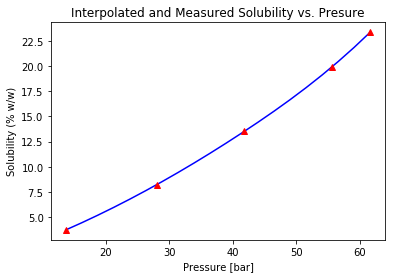

In [26]:
# copy-paste data from file "co2_solubility_pressures.xlsx"
data = np.array([[198.1, 0.0372],
        [405.6, 0.0821],
        [606.1, 0.1351],
        [806.8, 0.1993],
        [893.9, 0.2336]])
# temperature [K]
T = 298

# first column is pressure in psia
p_data_psia = data[:,0]
# second column is solubility in fraction w/w
solubility_data = data[:,1]

# convert pressure to bar
p_data_bar = psi2pa/bar2pa * p_data_psia
# create interpolation function using a cubic spline and plot
f = interp1d(p_data_bar, solubility_data, kind="cubic")

# PLOT INTERPOLATION
p_interp = np.linspace(np.min(p_data_bar), np.max(p_data_bar), 20)
solubility_interp = f(p_interp)

# plot
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(p_interp, 100*solubility_interp, 'b-')
ax.plot(p_data_bar, 100*solubility_data, 'r^')
ax.set_xlabel('Pressure [bar]')
ax.set_ylabel('Solubility (% w/w)')
ax.set_title('Interpolated and Measured Solubility vs. Presure')

Convert data into quantities required to calculate the uncertainty.

In [27]:
# interpolate solubility
solubility = f(p)

# pressure in pascals
p_pa = bar2pa*p

# compute volume of gas phase in m^3
V_gas = V_tot - V_poly
V_gas_m3 = mL2m3 * V_gas

# number of moles in gas phase
n_co2_gas = p_pa*V_gas_m3/(R*T)
# mass of co2 in the gas phase [g]
m_co2_gas = mw_co2 * n_co2_gas

# compute mass of co2 in solution [g]
m_poly = rho_poly * V_poly
m_co2_soln = solubility * m_poly

Compute required mass.

In [28]:
m_co2 = m_co2_soln + m_co2_gas
print(str(m_co2) + ' g of dry ice required for a pressure of ' + str(p) + ' bar and solubility of ' + str(solubility) + '.')

17.422308066665543 g of dry ice required for a pressure of 27.9650850122037 bar and solubility of 0.08209992645250652.
